In [6]:
%pip install pandas


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 10.8 MB 9.6 MB/s eta 0:00:01
     |████████████████████████████████| 348 kB 23.1 MB/s eta 0:00:01
     |████████████████████████████████| 5.3 MB 35.7 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 14.6 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [13]:
%pip install numpy
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.8 MB 8.9 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 39.6 MB/s eta 0:00:01
     |████████████████████████████████| 122 kB 18.8 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 35.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 9.6 MB/s  eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("credit_card_default.csv")

df.head(5)

Matplotlib is building the font cache; this may take a moment.


,Unnamed: 0,limit_bal,sex,education,marriage,age,payment_status_sep,payment_status_aug,payment_status_jul,payment_status_jun,...,bill_statement_jun,bill_statement_may,bill_statement_apr,previous_payment_sep,previous_payment_aug,previous_payment_jul,previous_payment_jun,previous_payment_may,previous_payment_apr,default_payment_next_month
0,0,20000,Female,University,Married,24.0,Payment delayed 2 months,Payment delayed 2 months,Payed duly,Payed duly,...,0,0,0,0,689,0,0,0,0,1
1,1,120000,Female,University,Single,26.0,Payed duly,Payment delayed 2 months,Unknown,Unknown,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,90000,Female,University,Single,34.0,Unknown,Unknown,Unknown,Unknown,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,50000,Female,University,Married,37.0,Unknown,Unknown,Unknown,Unknown,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,50000,Male,University,Married,57.0,Payed duly,Unknown,Payed duly,Unknown,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [12]:
default_rate=df['default_payment_next_month'].mean()
print(default_rate)

0.2212


In [16]:
print("shape of data",df.shape)
print("data type")
df.dtypes

shape of data (30000, 25)
data type


Unnamed: 0                      int64
limit_bal                       int64
sex                            object
education                      object
marriage                       object
age                           float64
payment_status_sep             object
payment_status_aug             object
payment_status_jul             object
payment_status_jun             object
payment_status_may             object
payment_status_apr             object
bill_statement_sep              int64
bill_statement_aug              int64
bill_statement_jul              int64
bill_statement_jun              int64
bill_statement_may              int64
bill_statement_apr              int64
previous_payment_sep            int64
previous_payment_aug            int64
previous_payment_jul            int64
previous_payment_jun            int64
previous_payment_may            int64
previous_payment_apr            int64
default_payment_next_month      int64
dtype: object

In [27]:
# checking missing values
missing_df= df.isnull().sum().reset_index()

missing_df.columns=['columns','missing_count']
missing_df[missing_df['missing_count']>0]

,columns,missing_count
2,sex,150
3,education,150
4,marriage,150
5,age,150


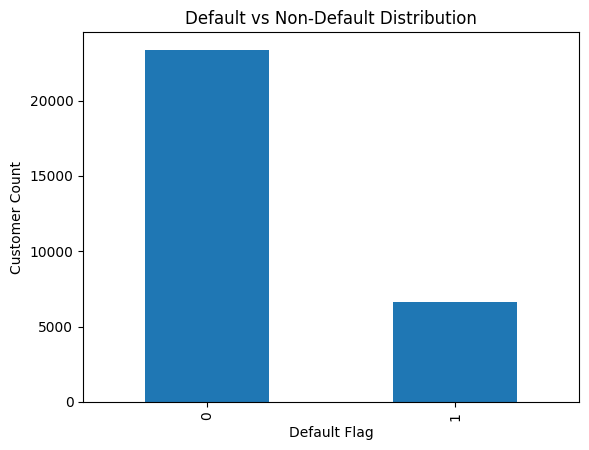

In [28]:
plt.figure()
df['default_payment_next_month'].value_counts().plot(kind='bar')
plt.title("Default vs Non-Default Distribution")
plt.xlabel("Default Flag")
plt.ylabel("Customer Count")
plt.show()


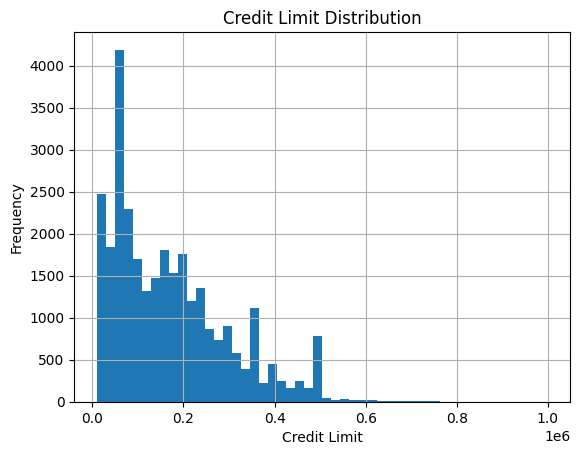

In [29]:
plt.figure()
df['limit_bal'].hist(bins=50)
plt.title("Credit Limit Distribution")
plt.xlabel("Credit Limit")
plt.ylabel("Frequency")
plt.show()


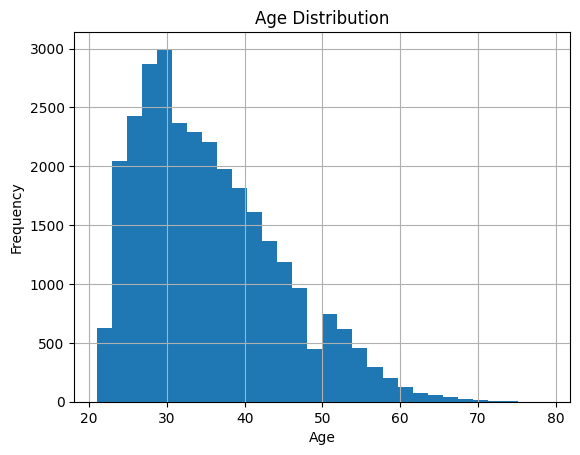

In [30]:
plt.figure()
df['age'].dropna().hist(bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


In [35]:
df['payment_delay_flag']=(df['payment_status_sep']!='Payed duly').astype(int)


In [36]:
delay_default_rate=(
    df.groupby('payment_delay_flag')['default_payment_next_month'].mean()
)
delay_default_rate

payment_delay_flag
0    0.167781
1    0.233693
Name: default_payment_next_month, dtype: float64

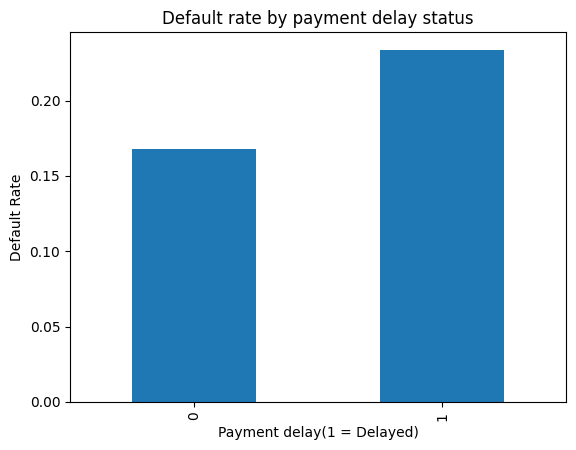

In [37]:
plt.figure()
delay_default_rate.plot(kind='bar')
plt.title("Default rate by payment delay status")
plt.xlabel("Payment delay(1 = Delayed)")
plt.ylabel("Default Rate")
plt.show()

In [38]:
df.describe()


,Unnamed: 0,limit_bal,age,bill_statement_sep,bill_statement_aug,bill_statement_jul,bill_statement_jun,bill_statement_may,bill_statement_apr,previous_payment_sep,previous_payment_aug,previous_payment_jul,previous_payment_jun,previous_payment_may,previous_payment_apr,default_payment_next_month,payment_delay_flag
count,30000.000000,30000.000000,29850.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,14999.500000,167484.322667,35.490117,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200,0.810467
std,8660.398374,129747.661567,9.217852,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062,0.391938
min,0.000000,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7499.750000,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000,1.000000
50%,14999.500000,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000,1.000000
75%,22499.250000,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000,1.000000
max,29999.000000,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000,1.000000
